# Cohort Analysis for Accessing Customer Retention in E-shops Ecommerce Industry



**Cohort analysis involves dividing users into different groups(cohorts) based on certain chateristics**

This study defines cohorts by user time of acquisition. It groups users together based on time of acquisition. This would enable us to study how each cohort bahaves interm of enagement and retention

**Retention Rate Time-based Cohort Analysis(RRTCA)**

RRTCA is aspecialized form of CA that focuses on the retention of users over multiple period of times.

To perform RRTCA, we need to:

- Create cohort based on the user's acquisistion date
- Measure the percentage of users from each cohort who continue to enagage with the product or service over given period of time
- Analyze how retention rate varies across various cohorts and time period.

*This will allow us to identify trends and enables us to make data insightful decision This will also reveals whether certain cohort have better or worse retention rates, enabling the business to understand the factors contributing to user retention or attrition It can also optimize product market and customer support strategies*

# **Importing Libraries**

In [177]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [178]:
data = pd.read_csv("dataset_ecommerce.csv")

In [179]:
data.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda


In [180]:
len(data)

541909

In [181]:
#To incude all the columns
data.describe(include="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,541909,541909,406829.000000,541909,541909,541909.000000,541909.000000,541909
unique,25900,23260,NaN,9000,10,NaN,NaN,28
top,573585,2011-10-31 14:41:00,NaN,SC2014,Sports Equipment,NaN,NaN,Cote d'Ivoire
freq,1114,1114,NaN,96,54765,NaN,NaN,19651
mean,NaN,NaN,15287.690570,NaN,NaN,50.534748,50.476354,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.849367,28.564775,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,26.000000,25.750000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,51.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,76.000000,75.180000,NaN


In [182]:
#check for missing values

data.isnull()

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [183]:
#sum up the missing data for each feature

data.isnull().sum()

InvoiceNo           0
InvoiceDate         0
CustomerID     135080
StockCode           0
Description         0
Quantity            0
UnitPrice           0
Country             0
dtype: int64

In [184]:
myData=data.dropna()
len(myData)

406829

In [185]:
myData.describe(include="all")

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
count,406829,406829,406829.000000,406829,406829,406829.000000,406829.000000,406829
unique,22190,20460,NaN,9000,10,NaN,NaN,28
top,576339,2011-11-14 15:27:00,NaN,SC2014,Jewelry,NaN,NaN,Nigeria
freq,542,543,NaN,79,41017,NaN,NaN,14714
mean,NaN,NaN,15287.690570,NaN,NaN,50.478471,50.477654,NaN
std,NaN,NaN,1713.600303,NaN,NaN,28.872921,28.573075,NaN
min,NaN,NaN,12346.000000,NaN,NaN,1.000000,1.000000,NaN
25%,NaN,NaN,13953.000000,NaN,NaN,25.000000,25.710000,NaN
50%,NaN,NaN,15152.000000,NaN,NaN,50.000000,50.430000,NaN
75%,NaN,NaN,16791.000000,NaN,NaN,75.000000,75.170000,NaN


In [186]:
# Only customerID has missing value,this might be as a result of wrong entry.
# Since we only want to analyze the customer we know, we need to drop the miss value
#data.dropna(inplace =True)


In [187]:
myData.isnull().sum()

InvoiceNo      0
InvoiceDate    0
CustomerID     0
StockCode      0
Description    0
Quantity       0
UnitPrice      0
Country        0
dtype: int64

In [188]:
#check for more information

myData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   InvoiceDate  406829 non-null  object 
 2   CustomerID   406829 non-null  float64
 3   StockCode    406829 non-null  object 
 4   Description  406829 non-null  object 
 5   Quantity     406829 non-null  int64  
 6   UnitPrice    406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


In [189]:
myData

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali
3,536365,2010-12-01 08:26:00,17850.0,SC6228,Toys,15,24.73,South Africa
4,536365,2010-12-01 08:26:00,17850.0,SC2149,Toys,50,38.83,Rwanda
...,...,...,...,...,...,...,...,...
541904,581587,2011-12-09 12:50:00,12680.0,SC5440,Furniture,25,36.53,Mozambique
541905,581587,2011-12-09 12:50:00,12680.0,SC3576,Cloths,94,90.65,Tunisia
541906,581587,2011-12-09 12:50:00,12680.0,SC5283,Furniture,14,40.07,Somalia
541907,581587,2011-12-09 12:50:00,12680.0,SC1099,Cosmetics,45,79.83,Senegal


In [190]:
#convert  InvoiceDate to datetime

myData["InvoiceDate"] =pd.to_datetime(data["InvoiceDate"])

# Exploratory Data Analysis (EDA)

**Analysis by Country**

In [191]:
# Using groupby method

qty_by_country = myData.groupby(['Country'])['Quantity'].sum()
qty_by_country

Country
Algeria          736181
Benin            738133
Burkina Faso     728332
Cameroon         730881
Cote d'Ivoire    740229
Egypt            729299
Ethiopia         732940
Ghana            735354
Kenya            732247
Libya            739206
Madagascar       726297
Mali             732358
Morocco          732594
Mozambique       735416
Niger            725841
Nigeria          739708
Rwanda           733511
Senegal          733968
Sierra Leone     735477
Somalia          736219
South Africa     740589
Sudan            734158
Tanzania         725664
Togo             741223
Tunisia          733082
Uganda           724525
Zambia           725152
Zimbabwe         737522
Name: Quantity, dtype: int64

In [192]:
# put it in dataframe and sort by quantity

qty_by_country = qty_by_country.reset_index()
qty_by_country.head(3)

,Country,Quantity
0,Algeria,736181
1,Benin,738133
2,Burkina Faso,728332


In [193]:
qty_by_country = qty_by_country.sort_values("Quantity", ascending=False)

qty_by_country.head(5)

,Country,Quantity
23,Togo,741223
20,South Africa,740589
4,Cote d'Ivoire,740229
15,Nigeria,739708
9,Libya,739206


In [194]:
top_5_countries_to_qty=qty_by_country.head(5)
top_5_countries_to_qty

,Country,Quantity
23,Togo,741223
20,South Africa,740589
4,Cote d'Ivoire,740229
15,Nigeria,739708
9,Libya,739206


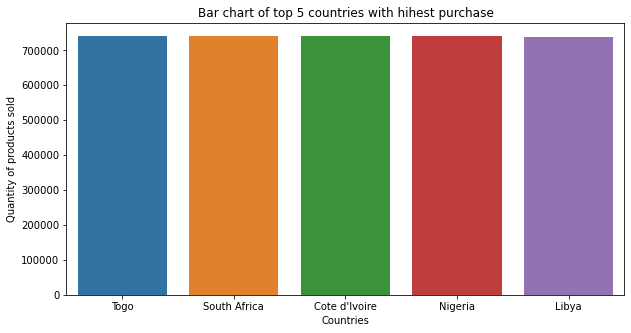

In [195]:
#visualize top 5 countries where most products are sold



plt.figure(figsize = (10,5))

ax =sns.barplot(x="Country", y ="Quantity", data =top_5_countries_to_qty)

plt.xlabel("Countries")
plt.ylabel("Quantity of products sold")
plt.title("Bar chart of top 5 countries with hihest purchase")
plt.show()

In [196]:
least_5_countries_to_qty =qty_by_country.tail(5)
least_5_countries_to_qty

,Country,Quantity
10,Madagascar,726297
14,Niger,725841
22,Tanzania,725664
26,Zambia,725152
25,Uganda,724525


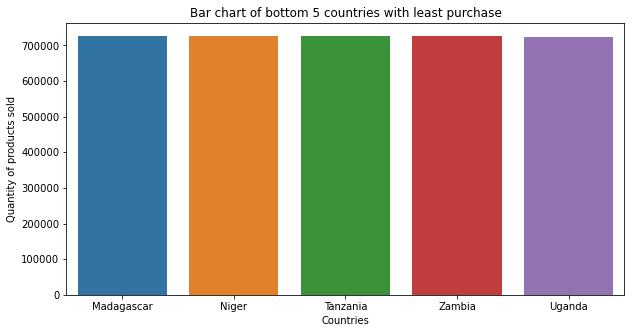

In [197]:
#visualize bottom 5 countries where most products are sold
#from matplotlib import pyplot as plt

plt.figure(figsize = (10,5))

ax =sns.barplot(x="Country", y ="Quantity", data =least_5_countries_to_qty)

plt.xlabel("Countries")
plt.ylabel("Quantity of products sold")
plt.title("Bar chart of bottom 5 countries with least purchase")
plt.show()

### Analysis of Countries and Number of Customers

In [198]:
qty_by_coustomers =myData.groupby(['Country'])['CustomerID'].nunique().reset_index()
qty_by_coustomers.head(3)

,Country,CustomerID
0,Algeria,3043
1,Benin,3054
2,Burkina Faso,3049


In [199]:
top_5_countries_to_customer = qty_by_coustomers.head(5)

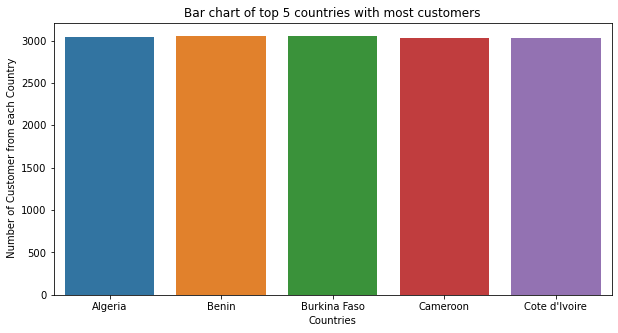

In [200]:
#visualize top 5 countries where most customers came from

plt.figure(figsize = (10,5))

ax =sns.barplot(x="Country", y ="CustomerID", data =top_5_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel(" Number of Customer from each Country")
plt.title("Bar chart of top 5 countries with most customers")
plt.show()

In [201]:
least_5_countries_to_customer = qty_by_coustomers.tail(5)

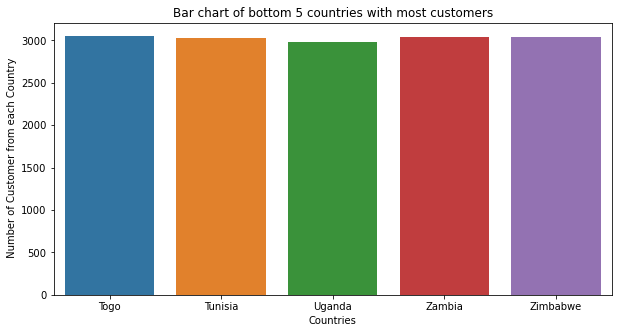

In [202]:
#visualize bottom 5 countries where most customers came from

plt.figure(figsize = (10,5))

ax =sns.barplot(x="Country", y ="CustomerID", data =least_5_countries_to_customer)

plt.xlabel("Countries")
plt.ylabel(" Number of Customer from each Country")
plt.title("Bar chart of bottom 5 countries with most customers")
plt.show()

### Sales Trend Visiualization

In [203]:

monthly_sales = myData.groupby(myData['InvoiceDate'].dt.to_period('M'))['Quantity'].sum()


monthly_sales                          

InvoiceDate
2010-12    1350834
2011-01    1105886
2011-02    1033468
2011-03    1406617
2011-04    1175052
2011-05    1459981
2011-06    1402857
2011-07    1388119
2011-08    1387695
2011-09    2061181
2011-10    2559609
2011-11    3313177
2011-12     891630
Freq: M, Name: Quantity, dtype: int64

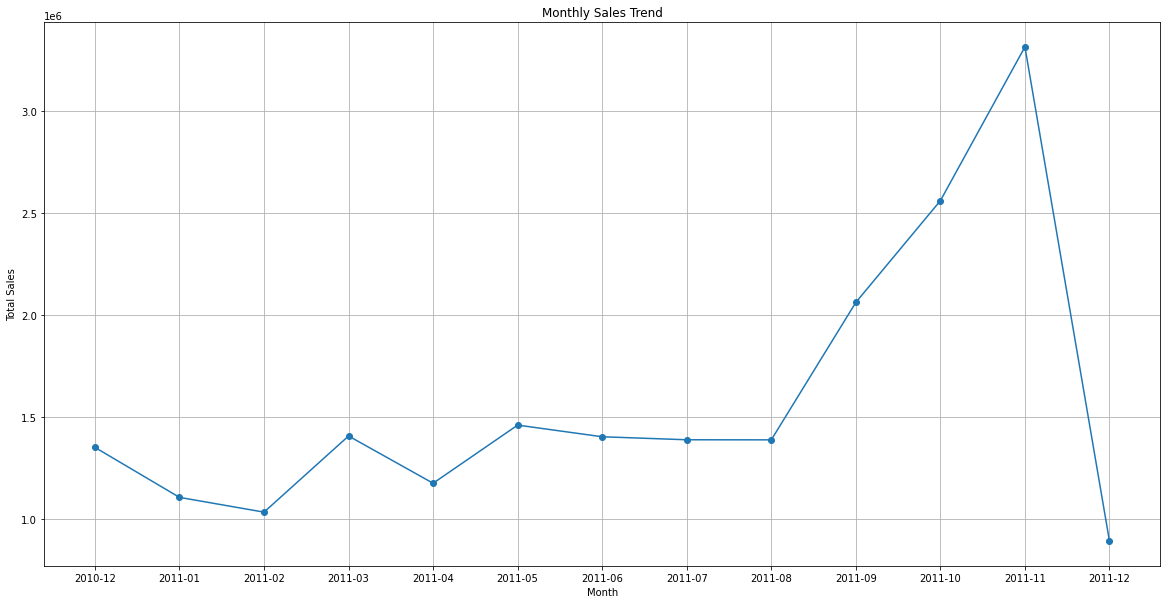

In [204]:

plt.figure(figsize = (20,10))

plt.plot(monthly_sales.index.strftime('%Y-%m'), monthly_sales.values, marker = 'o', linestyle = '-')
plt.xlabel("Month")
plt.ylabel("Total Sales") 
plt.title("Monthly Sales Trend")
plt.grid(True)
plt.show()


# Cohort Analysis

In [205]:
myData.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01 08:26:00,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01 08:26:00,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01 08:26:00,17850.0,SC3463,Books,78,61.49,Mali


In [206]:
#Extract only the month from InvoiceDate column

def get_month(x):
    return dt.datetime(x.year, x.month, 1)

In [207]:
myData['InvoiceDate'] =myData['InvoiceDate'].apply(get_month)
myData.head(3)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali


In [208]:
#Create a cohort date for every unique customer i.e, the first day they made first purchase
#loop through the data and select the minimum (min) date from the InvoiceDate
def get_cohort_date(myData):
    myData['cohort_date'] = myData.groupby('CustomerID')['InvoiceDate'].transform('min')
    return myData['cohort_date']


In [209]:
myData['cohort_date'] = get_cohort_date(myData)
myData.head(5)

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01


### Create cohort index

In [210]:
def get_year_month(myData, col):
    month = myData[col].dt.month
    year = myData[col].dt.year
    day = myData[col].dt.day
    return day,month,year

In [211]:
first_day,first_month, first_year = get_year_month(myData, 'cohort_date')


In [212]:
first_day, first_month, first_year

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 541904    1
 541905    1
 541906    1
 541907    1
 541908    1
 Name: cohort_date, Length: 406829, dtype: int64,
 0         12
 1         12
 2         12
 3         12
 4         12
           ..
 541904     8
 541905     8
 541906     8
 541907     8
 541908     8
 Name: cohort_date, Length: 406829, dtype: int64,
 0         2010
 1         2010
 2         2010
 3         2010
 4         2010
           ... 
 541904    2011
 541905    2011
 541906    2011
 541907    2011
 541908    2011
 Name: cohort_date, Length: 406829, dtype: int64)

In [213]:
# get the latest year and amonth
latest_day,latest_month, latest_year = get_year_month(myData, 'InvoiceDate')
latest_day,latest_month, latest_year

(0         1
 1         1
 2         1
 3         1
 4         1
          ..
 541904    1
 541905    1
 541906    1
 541907    1
 541908    1
 Name: InvoiceDate, Length: 406829, dtype: int64,
 0         12
 1         12
 2         12
 3         12
 4         12
           ..
 541904    12
 541905    12
 541906    12
 541907    12
 541908    12
 Name: InvoiceDate, Length: 406829, dtype: int64,
 0         2010
 1         2010
 2         2010
 3         2010
 4         2010
           ... 
 541904    2011
 541905    2011
 541906    2011
 541907    2011
 541908    2011
 Name: InvoiceDate, Length: 406829, dtype: int64)

#### Create the cohort index
-cohort_index is how many month away from the first purchase to the latest purchase

In [214]:
def create_cohort_index(first_month, first_year, latest_month, latest_year):
    year_diff = latest_year-first_year
  ##  if year_diff == 0:
      ##  year_diff = year_diff+1
        #else year_diff = year_diff
    month_diff = latest_month-first_month
    ##if month_diff == 0:
        ##month_diff = month_diff+1
        ##else month_diff = month_diff
    #for us to get atleast 1 index for customer that make purchase just once,
    #we need to add 1. this is to avoid zero value, because yeardiff or monthdiff would be zero for a single purchase
    index = year_diff*12 + month_diff+1
    return index


In [215]:
myData['first_year'] = first_year
myData['latest_year'] = latest_year
myData['first_year'] = first_month
myData['latest_year'] = latest_month
myData

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,first_year,latest_year
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,12,12
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,12,12
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,12,12
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,12,12
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,12,12
...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,8,12
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,8,12
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,8,12
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,8,12


In [216]:
myData['cohort_index'] = create_cohort_index(first_month, first_year,latest_month, latest_year)
myData

,InvoiceNo,InvoiceDate,CustomerID,StockCode,Description,Quantity,UnitPrice,Country,cohort_date,first_year,latest_year,cohort_index
0,536365,2010-12-01,17850.0,SC1734,Electronics,65,10.23,Egypt,2010-12-01,12,12,1
1,536365,2010-12-01,17850.0,SC2088,Furniture,95,19.61,Mali,2010-12-01,12,12,1
2,536365,2010-12-01,17850.0,SC3463,Books,78,61.49,Mali,2010-12-01,12,12,1
3,536365,2010-12-01,17850.0,SC6228,Toys,15,24.73,South Africa,2010-12-01,12,12,1
4,536365,2010-12-01,17850.0,SC2149,Toys,50,38.83,Rwanda,2010-12-01,12,12,1
...,...,...,...,...,...,...,...,...,...,...,...,...
541904,581587,2011-12-01,12680.0,SC5440,Furniture,25,36.53,Mozambique,2011-08-01,8,12,5
541905,581587,2011-12-01,12680.0,SC3576,Cloths,94,90.65,Tunisia,2011-08-01,8,12,5
541906,581587,2011-12-01,12680.0,SC5283,Furniture,14,40.07,Somalia,2011-08-01,8,12,5
541907,581587,2011-12-01,12680.0,SC1099,Cosmetics,45,79.83,Senegal,2011-08-01,8,12,5


#### Create a Cohort Table

In [217]:
cohort_info =myData.groupby(['cohort_date', 'cohort_index'])['CustomerID'].nunique().reset_index()
cohort_info.rename(columns = {'CustomerID': 'No of Customers'}, inplace=True)
cohort_info

,cohort_date,cohort_index,No of Customers
0,2010-12-01,1,948
1,2010-12-01,2,362
2,2010-12-01,3,317
3,2010-12-01,4,367
4,2010-12-01,5,341
...,...,...,...
86,2011-10-01,2,93
87,2011-10-01,3,46
88,2011-11-01,1,321
89,2011-11-01,2,43


In [241]:
cohort_table = cohort_info.pivot(index = 'cohort_date', columns = ['cohort_index'], values = 'No of Customers')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
2011-01-01,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
2011-02-01,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
2011-03-01,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
2011-04-01,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
2011-05-01,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [242]:
cohort_table.index = cohort_table.index.strftime('%B''%Y')
cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December2010,948.0,362.0,317.0,367.0,341.0,376.0,360.0,336.0,336.0,374.0,354.0,474.0,260.0
January2011,421.0,101.0,119.0,102.0,138.0,126.0,110.0,108.0,131.0,146.0,155.0,63.0,NaN
February2011,380.0,94.0,73.0,106.0,102.0,94.0,97.0,107.0,98.0,119.0,35.0,NaN,NaN
March2011,440.0,84.0,112.0,96.0,102.0,78.0,116.0,105.0,127.0,39.0,NaN,NaN,NaN
April2011,299.0,68.0,66.0,63.0,62.0,71.0,69.0,78.0,25.0,NaN,NaN,NaN,NaN
May2011,279.0,66.0,48.0,48.0,60.0,68.0,74.0,29.0,NaN,NaN,NaN,NaN,NaN
June2011,235.0,49.0,44.0,64.0,58.0,79.0,24.0,NaN,NaN,NaN,NaN,NaN,NaN
July2011,191.0,40.0,39.0,44.0,52.0,22.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August2011,167.0,42.0,42.0,42.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

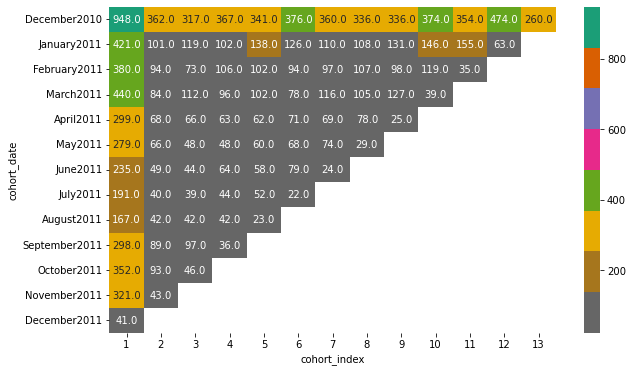

In [243]:
plt.figure(figsize=(10,6))
sns.heatmap(cohort_table, annot=True, cmap='Dark2_r', fmt='.1f')

In [244]:
new_cohort_table = cohort_table.divide(cohort_table.iloc[:,0], axis=0)


In [245]:
new_cohort_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December2010,1.0,0.381857,0.334388,0.387131,0.359705,0.396624,0.379747,0.354430,0.354430,0.394515,0.373418,0.500000,0.274262
January2011,1.0,0.239905,0.282660,0.242280,0.327791,0.299287,0.261283,0.256532,0.311164,0.346793,0.368171,0.149644,NaN
February2011,1.0,0.247368,0.192105,0.278947,0.268421,0.247368,0.255263,0.281579,0.257895,0.313158,0.092105,NaN,NaN
March2011,1.0,0.190909,0.254545,0.218182,0.231818,0.177273,0.263636,0.238636,0.288636,0.088636,NaN,NaN,NaN
April2011,1.0,0.227425,0.220736,0.210702,0.207358,0.237458,0.230769,0.260870,0.083612,NaN,NaN,NaN,NaN
May2011,1.0,0.236559,0.172043,0.172043,0.215054,0.243728,0.265233,0.103943,NaN,NaN,NaN,NaN,NaN
June2011,1.0,0.208511,0.187234,0.272340,0.246809,0.336170,0.102128,NaN,NaN,NaN,NaN,NaN,NaN
July2011,1.0,0.209424,0.204188,0.230366,0.272251,0.115183,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August2011,1.0,0.251497,0.251497,0.251497,0.137725,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

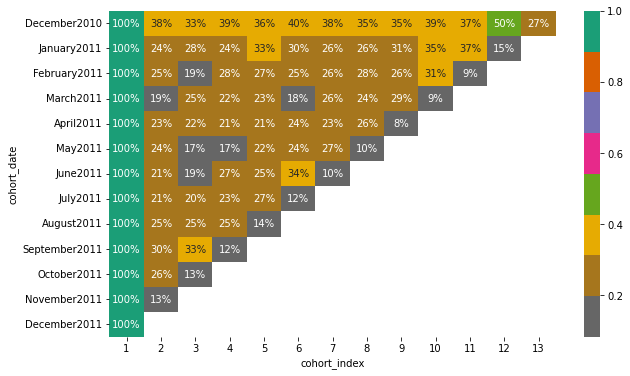

In [246]:
plt.figure(figsize=(10,6))
sns.heatmap(new_cohort_table, annot=True, cmap='Dark2_r', fmt='.0%')


##### Quantity Bought

In [253]:
qty_bought = myData.groupby(['cohort_date','cohort_index'])['Quantity'].sum()

qty_bought=qty_bought.reset_index()

In [254]:
qty_table = qty_bought.pivot(index = 'cohort_date', columns = ['cohort_index'], values = 'Quantity')
qty_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
2011-01-01,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
2011-02-01,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
2011-03-01,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
2011-04-01,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
2011-05-01,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
2011-06-01,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [255]:
qty_table.index = qty_table.index.strftime('%B %Y')
qty_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,1350834.0,546873.0,462374.0,613244.0,510943.0,636443.0,597676.0,604504.0,600481.0,757806.0,725896.0,1165046.0,375469.0
January 2011,559013.0,121074.0,155931.0,120023.0,194675.0,166585.0,144835.0,149848.0,200661.0,258400.0,330607.0,76504.0,NaN
February 2011,450020.0,74008.0,98850.0,122918.0,111386.0,104214.0,108442.0,135276.0,151180.0,145405.0,21787.0,NaN,NaN
March 2011,563434.0,74215.0,125519.0,119480.0,122078.0,107554.0,139852.0,182259.0,212009.0,49685.0,NaN,NaN,NaN
April 2011,371021.0,71541.0,66410.0,65115.0,70639.0,105065.0,97319.0,110572.0,27119.0,NaN,NaN,NaN,NaN
May 2011,308885.0,55453.0,44637.0,45690.0,76473.0,118534.0,97156.0,41183.0,NaN,NaN,NaN,NaN,NaN
June 2011,285867.0,47847.0,35516.0,76483.0,88504.0,127400.0,31264.0,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,254889.0,25983.0,68721.0,69466.0,91529.0,26831.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,243542.0,80156.0,144849.0,141888.0,45405.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

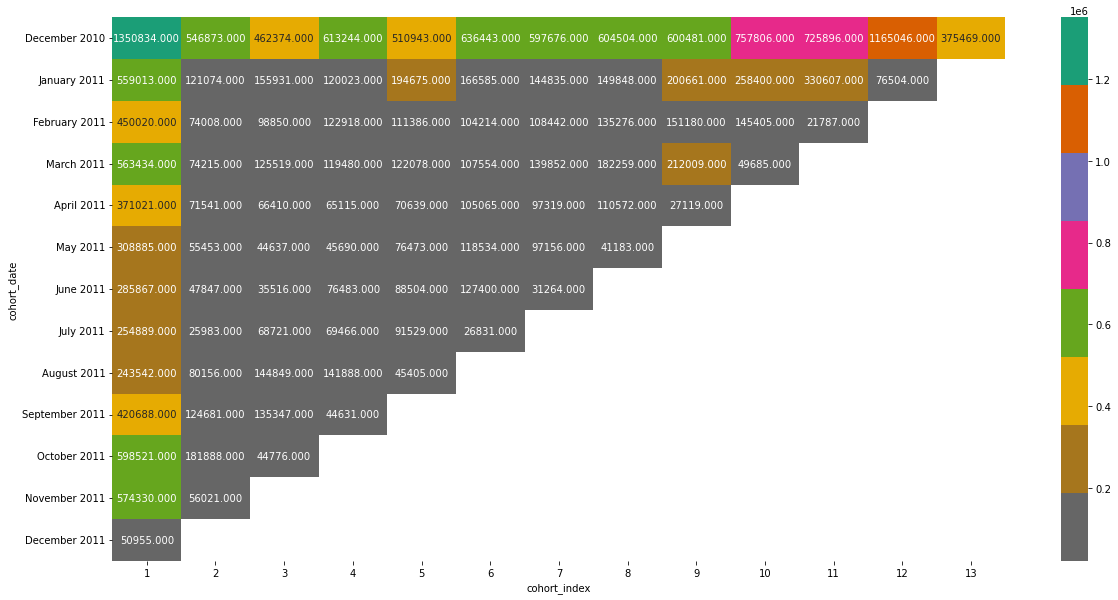

In [257]:
plt.figure(figsize=(20,10))
sns.heatmap(qty_table, annot=True, cmap='Dark2_r', fmt='.3f')


###### Average quantity bought

In [258]:
ave_qty_bought = myData.groupby(['cohort_date','cohort_index'])['Quantity'].mean()

ave_qty_bought=ave_qty_bought.reset_index()


In [260]:
ave_qty_table = ave_qty_bought.pivot(index = 'cohort_date', columns = ['cohort_index'], values = 'Quantity')
ave_qty_table


cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
2010-12-01,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
2011-01-01,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
2011-02-01,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
2011-03-01,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
2011-04-01,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
2011-05-01,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
2011-06-01,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
2011-07-01,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-08-01,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [261]:
ave_qty_table.index = ave_qty_table.index.strftime('%B %Y')
ave_qty_table

cohort_index,1,2,3,4,5,6,7,8,9,10,11,12,13
cohort_date,,,,,,,,,,,,,
December 2010,50.310391,50.259443,50.351084,50.635290,50.628518,50.423309,50.526334,50.467858,50.182266,50.574346,50.546341,50.640963,50.677419
January 2011,50.676548,50.616221,50.758789,50.621257,50.908734,50.373450,50.289931,50.436890,50.468058,49.942018,50.590207,50.531044,NaN
February 2011,51.208466,49.736559,51.032525,50.334971,50.219116,50.687743,49.180045,50.741185,50.919502,49.592428,50.085057,NaN,NaN
March 2011,50.527666,50.213126,50.247798,50.243902,50.114122,50.613647,50.000715,51.081558,50.120331,50.441624,NaN,NaN,NaN
April 2011,50.685929,49.854355,49.969902,50.127021,50.637276,50.318487,50.294057,49.919639,51.071563,NaN,NaN,NaN,NaN
May 2011,50.745030,49.379341,50.153933,49.663043,51.186747,50.547548,49.926002,51.350374,NaN,NaN,NaN,NaN,NaN
June 2011,50.578025,50.955272,48.452933,50.550562,51.366222,50.878594,50.263666,NaN,NaN,NaN,NaN,NaN,NaN
July 2011,50.734275,49.491429,50.791574,50.083634,49.771071,50.720227,NaN,NaN,NaN,NaN,NaN,NaN,NaN
August 2011,50.506429,49.848259,50.434889,51.038849,50.171271,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='cohort_index', ylabel='cohort_date'>

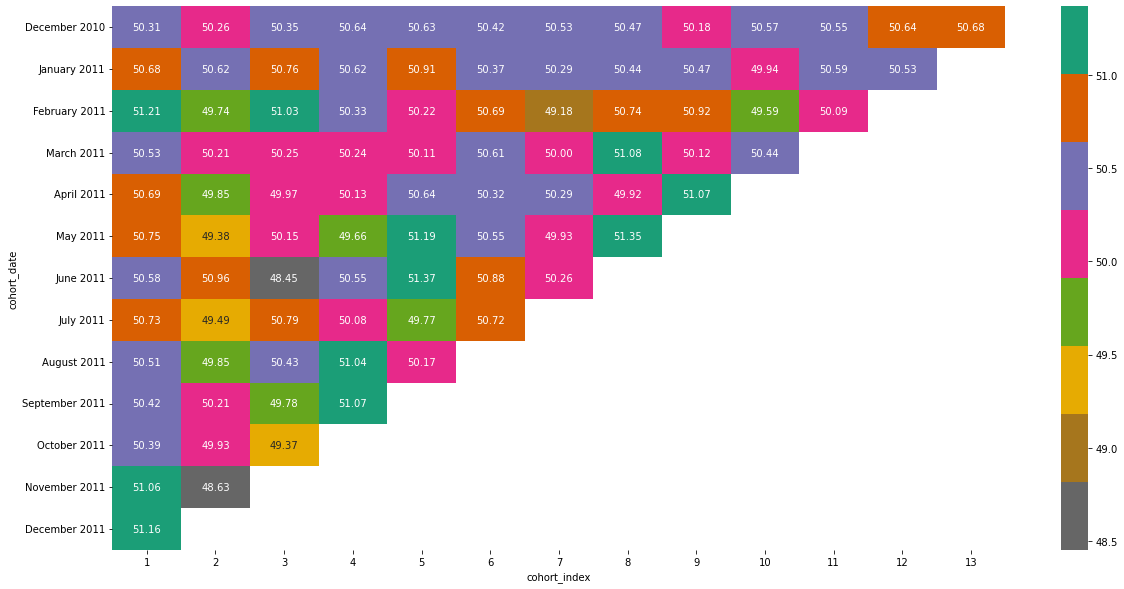

In [263]:
plt.figure(figsize=(20,10))
sns.heatmap(ave_qty_table, annot=True, cmap='Dark2_r', fmt='.2f')
